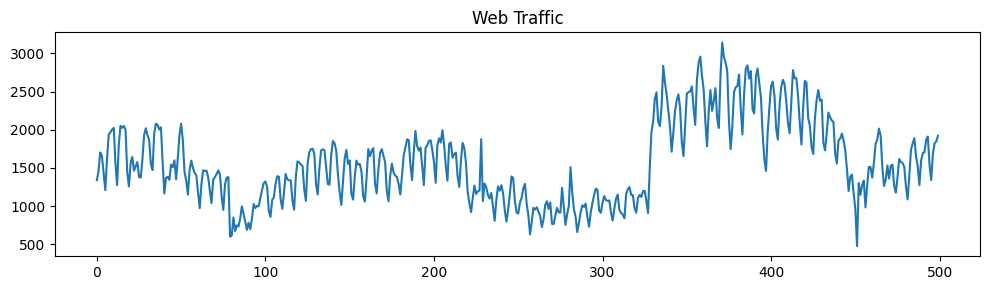

In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


def load_traffic_data() -> np.ndarray[int]:
    with Path("input01.txt").open() as f:
        n = int(f.readline())  # number of traffics
        traffics = [int(f.readline()) for _ in range(n)]
    return np.array(traffics)


data = load_traffic_data()
fig, axs = plt.subplots(figsize=(10, 3))
axs.set_title("Web Traffic")
axs.plot(data)
fig.tight_layout()

自己相関を調べるためにコレログラムを描画してみます。
コレログラムのx軸はラグ、y軸は自己相関係数です。

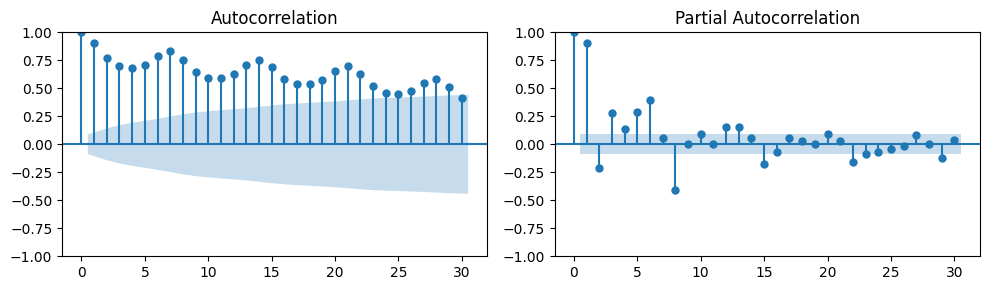

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(data, lags=30, ax=axs[0])
plot_pacf(data, lags=30, ax=axs[1])
plt.tight_layout()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3415.647
Date:                Mon, 10 Mar 2025   AIC                           6837.294
Time:                        22:07:31   BIC                           6849.932
Sample:                             0   HQIC                          6842.254
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3548      0.136     -2.609      0.009      -0.621      -0.088
ma.L1          0.6113      0.115      5.314      0.000       0.386       0.837
sigma2      5.163e+04   2827.773     18.257      0.0

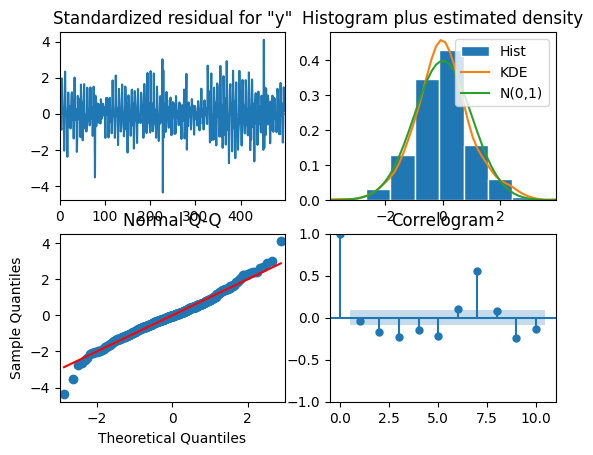

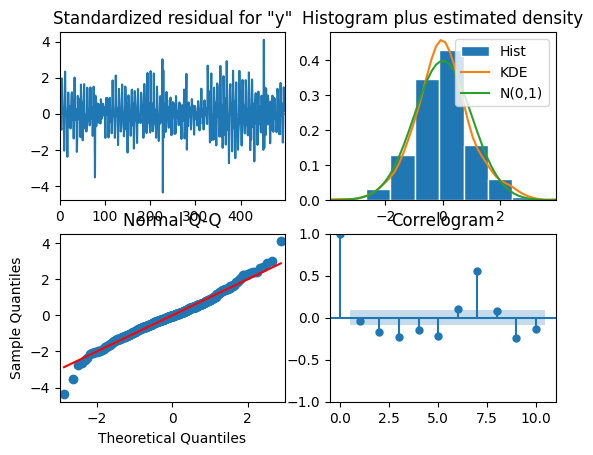

In [7]:
# モデルの定義 (p, d, q を指定)
model = ARIMA(data, order=(1, 1, 1)).fit()

# モデルの診断
print(model.summary())
model.plot_diagnostics()


AutoARIMA で ARIMA モデルの最適なパラメータを探索。

In [ ]:
import pmdarima

model = pmdarima.auto_arima(data, seasonal=False)
print(model.summary())